## Overview from Orem

Present your findings to the class in a compelling way, speaking for 10 minutes or so (if you have more to share and just can't help it, you are welcome to run over that). You don't need to cover everything in your analysis, focus on the fun / interesting / compelling highlights or challenges. A clean notebook with good visualizations (pre-run, don't need to run it live; please do have it cleaned up for a presentation context) or slides would both be fine, whatever works for your team.

Please note that a given sub-area (PCA, or hyperparameter optimization, etc.) may not be that meaningful for your particular dataset. It is fine to emphasize one area less and another area more.

The point totals below are more guidelines. Explaning your dataset is important, the main focus is on supervised learning, and dimensionality reduction and clustering can (sometimes) give us cool insights. I won't be viewing the presentations and subtracting points for not mentioning a certain line item. The real goal is "show your peers some cool analysis of data, demonstrating that you have learned to apply the key ideas of the course to a novel dataset".

As always, please feel free to email me with any questions.


### 5 pts: introduce your dataset to the audience. Here are some suggested key points.

- how many features? how many rows?
- continuous or categorical? missing data?
- What is your dependent variable? regression or classification? distribution?
- did you need to perform any data exploration, cleaning, transformation?


### 10 pts: perform some thoughtful supervised learning, including engineering and selecting features, selecting and optimizing a model, and explaining your model (coefficients or feature importance, performance). Here are some suggested key points.

- feature engineering / selection, bivariate charts? Interactions?
- missing data? how to handle it?
- Selection of modeling algorithm? classification or regression? binary or multi-class?
- interpretation of variable importance, coefficients if applicable
- justification of choice of metric (accuracy, precision / recall, other?)
- is class weighting or over / under sampling appropriate?
- discussion of choice or tuning of hyperparameters, if any
- meaningful discussion of predictive power and conclusions from model
- look at misclassified examples from test dataset, what do they say about your model?
- outliers in data?


### 5 pts: PCA as data exploration and visualization. Here are some suggested key points.

- take a look at PCA, percent explained
- take a look at top eigenvector or two, what is it made out of?
- can you visualize your prediction problem by projecting to 2 dimensions?


### 5 pts: k-means as data exploration and visualization. Here are some suggested key points.

- discussion for choosing number of clusters
- analysis of cluster centers
- scatter plot(s) showing 2 dimensional perspective of clusters and cluster centers?
- meaningful interpretation / discussion of conclusions

## Load data

In [56]:
import pandas as pd
import numpy as np

file_path = "/Users/noellematthews/Downloads/clean_speeddating_with_na_no_bins2.csv"

df = pd.read_csv(file_path, low_memory=False)

# replace '?' values with NaNs
df = df.applymap(lambda x: np.nan if x == '?' else x)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.drop(df.columns[[0, 1]], axis=1, inplace=True)

print(df.head())



   gender   age  age_o  d_age                                   race  \
0  female  21.0   27.0      6  asian/pacific islander/asian-american   
1  female  21.0   22.0      1  asian/pacific islander/asian-american   
2  female  21.0   22.0      1  asian/pacific islander/asian-american   
3  female  21.0   23.0      2  asian/pacific islander/asian-american   
4  female  21.0   24.0      3  asian/pacific islander/asian-american   

                                  race_o  samerace  importance_same_race  \
0            european/caucasian-american         0                   2.0   
1            european/caucasian-american         0                   2.0   
2  asian/pacific islander/asian-american         1                   2.0   
3            european/caucasian-american         0                   2.0   
4               latino/hispanic american         0                   2.0   

   importance_same_religion field  pref_o_attractive  pref_o_sincere  \
0                       4.0   law     

In [57]:
df.shape

(8378, 63)

## Feature selection using kbest

#### first pre process

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# categorical and numeric columns
categorical_cols = ["gender", "race", "race_o", "field"]
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['match']]

# preprocessing steps for categorical and numeric columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# add a column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)])

#  preprocessing steps to the data
X_processed = preprocessor.fit_transform(df)

print(pd.DataFrame(X_processed))


                                                      0
0       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
1       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
2       (0, 134)\t1.0\n  (0, 227)\t-1.51114549984364...
3       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
4       (0, 7)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
5       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
6       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
7       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
8       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
9       (0, 6)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-1...
10      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 134)\t1.0\...
11      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 134)\t1.0\...
12      (0, 2)\t1.0\n  (0, 134)\t1.0\n  (0, 227)\t-0...
13      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 134)\t1.0\...
14      (0, 2)\t1.0\n  (0, 7)\t1.0\n  (0, 134)\t1.0\...
15      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 134)\t1.0\...
16      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 134)\t

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

file_path = "/Users/noellematthews/Downloads/clean_speeddating_with_na_no_bins2.csv"


df = pd.read_csv(file_path, low_memory=False)

# replace '?' values with NaNs
df = df.applymap(lambda x: np.nan if x == '?' else x)

#= categorical columns and numeric columns
categorical_cols = ["gender", "race", "race_o", "field"]
all_cols = df.columns.tolist()
numeric_cols = [col for col in all_cols if col not in categorical_cols]
numeric_cols.remove('match')  # remove the target column if it exists

# transformers for categorical encoding and standard scaling
encoder = OneHotEncoder(handle_unknown='ignore')
std_scaler = StandardScaler()

# preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categories', encoder, categorical_cols),
        ('numeric', std_scaler, numeric_cols)
    ],
    remainder='passthrough'  # keep remaining columns as they are
)

# preprocessing steps to replace missing values and transform the data
X_processed = preprocessor.fit_transform(df)

# transformed data back to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=categorical_cols + numeric_cols)

X_processed_df.to_csv('/Users/noellematthews/Downloads/clean_speeddating_with_preprocessing.csv', index=False)


ValueError: Shape of passed values is (8378, 1), indices imply (8378, 64)

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

file_path = "/Users/noellematthews/Downloads/clean_speeddating_with_na_no_bins2.csv"


df = pd.read_csv(file_path, low_memory=False)

# replace '?' values with NaNs
df = df.applymap(lambda x: np.nan if x == '?' else x)

# categorical columns and numeric columns
categorical_cols = ["gender", "race", "race_o", "field"]
all_cols = df.columns.tolist()
numeric_cols = [col for col in all_cols if col not in categorical_cols]
numeric_cols.remove('match')  # remove the target column if it exists

# transformers for categorical encoding and standard scaling
encoder = OneHotEncoder(handle_unknown='ignore')
std_scaler = StandardScaler()

# preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categories', encoder, categorical_cols),
        ('numeric', std_scaler, numeric_cols)
    ],
    remainder='passthrough'  # keep remaining columns as they are
)

X_processed = preprocessor.fit_transform(df)

# concatenate transformed data with remaining columns
X_processed_df = pd.DataFrame(X_processed)
remaining_cols = [col for col in df.columns if col not in categorical_cols]
X_processed_df = pd.concat([X_processed_df, df[remaining_cols]], axis=1)

X_processed_df.to_csv('/Users/noellematthews/Downloads/clean_speeddating_with_preprocessing.csv', index=False)


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# define categorical and numeric columns
categorical_cols = ["gender", "race", "race_o", "field"]
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['match']]

# preprocessing steps for categorical and numeric columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))])  # set sparse_output=False instead of sparse=False

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# add column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)])

# preprocessing steps to the data
X_processed = preprocessor.fit_transform(df)

# column names after transformation
categorical_feature_names = preprocessor.named_transformers_['cat'] \
                                .named_steps['onehot'] \
                                .get_feature_names_out(input_features=categorical_cols)
column_names = list(categorical_feature_names) + numeric_cols

processed_df = pd.DataFrame(X_processed[:5], columns=column_names)  # first 5 rows

print(processed_df)


   gender_male  race_black/african american  race_european/caucasian-american  \
0          0.0                          0.0                               0.0   
1          0.0                          0.0                               0.0   
2          0.0                          0.0                               0.0   
3          0.0                          0.0                               0.0   
4          0.0                          0.0                               0.0   

   race_latino/hispanic american  race_other  race_o_black/african american  \
0                            0.0         0.0                            0.0   
1                            0.0         0.0                            0.0   
2                            0.0         0.0                            0.0   
3                            0.0         0.0                            0.0   
4                            0.0         0.0                            0.0   

   race_o_european/caucasian-american 

In [61]:
#use??? NO

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

file_path = "/Users/noellematthews/Downloads/clean_speeddating_with_na_no_bins2.csv"

df = pd.read_csv(file_path, low_memory=False)

# replace '?' values with NaNs
df = df.applymap(lambda x: np.nan if x == '?' else x)

# define categorical columns and numeric columns
categorical_cols = ["gender", "race", "race_o", "field"]
all_cols = df.columns.tolist()
numeric_cols = [col for col in all_cols if col not in categorical_cols]
numeric_cols.remove('match')  # remove the target column if it exists

# transformers for categorical encoding and standard scaling
encoder = OneHotEncoder(handle_unknown='ignore')
std_scaler = StandardScaler()

# preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categories', encoder, categorical_cols),
        ('numeric', std_scaler, numeric_cols)
    ],
    remainder='passthrough'  # keep remaining columns as they are
)

X_processed = preprocessor.fit_transform(df)

# concatenate transformed data with remaining columns
X_processed_df = pd.DataFrame(X_processed)
remaining_cols = [col for col in df.columns if col not in categorical_cols]
X_processed_df = pd.concat([X_processed_df, df[remaining_cols]], axis=1)

X_processed_df.to_csv('/Users/noellematthews/Downloads/clean_speeddating_with_preprocessing.csv', index=False)


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# define categorical and numeric columns
categorical_cols = ["gender", "race", "race_o", "field"]
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['match']]

# preprocessing steps for categorical and numeric columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))])  # set sparse_output=False instead of sparse=False

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)])

X_processed = preprocessor.fit_transform(df)

categorical_feature_names = preprocessor.named_transformers_['cat'] \
                                .named_steps['onehot'] \
                                .get_feature_names_out(input_features=categorical_cols)
column_names = list(categorical_feature_names) + numeric_cols

processed_df = pd.DataFrame(X_processed[:5], columns=column_names)  # first 5 rows

print(processed_df)
print("Shape of processed data:", X_processed.shape)


   gender_male  race_black/african american  race_european/caucasian-american  \
0          0.0                          0.0                               0.0   
1          0.0                          0.0                               0.0   
2          0.0                          0.0                               0.0   
3          0.0                          0.0                               0.0   
4          0.0                          0.0                               0.0   

   race_latino/hispanic american  race_other  race_o_black/african american  \
0                            0.0         0.0                            0.0   
1                            0.0         0.0                            0.0   
2                            0.0         0.0                            0.0   
3                            0.0         0.0                            0.0   
4                            0.0         0.0                            0.0   

   race_o_european/caucasian-american 

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

categorical_cols = ["gender", "race_o", "field"]  # only encode these categorical columns
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['match']]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)],
    remainder='passthrough')  

X_processed = preprocessor.fit_transform(df)

categorical_feature_names = preprocessor.named_transformers_['cat'] \
                                .named_steps['onehot'] \
                                .get_feature_names_out(input_features=categorical_cols)
column_names = list(categorical_feature_names) + numeric_cols

# convert the processed data back into a DataFrame with column names
processed_df = pd.DataFrame(X_processed[:5], columns=column_names) 

print(processed_df)
print("Shape of processed data:", X_processed.shape)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'asian/pacific islander/asian-american'

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# define categorical and numeric columns
categorical_cols = ["gender", "race_o", "field"]
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['match']]

# preprocessing steps for categorical and numeric columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)],
    remainder='passthrough')  # remaining columns as they are

X_processed = preprocessor.fit_transform(df)

# column names after transformation
categorical_feature_names = preprocessor.named_transformers_['cat'] \
                                .named_steps['onehot'] \
                                .get_feature_names_out(input_features=categorical_cols)
column_names = list(categorical_feature_names) + numeric_cols

# convert the processed data back into a DataFrame with column names
processed_df = pd.DataFrame(X_processed[:5], columns=column_names)  # display only the first 5 rows

print(processed_df)
print("Shape of processed data:", X_processed.shape)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'asian/pacific islander/asian-american'

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# define categorical and numeric columns
categorical_cols = ["gender", "race_o", "field"]
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['match']]

#preprocessing steps for categorical and numeric columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)])

X_processed = preprocessor.fit_transform(df)

# column names after transformation
categorical_feature_names = preprocessor.named_transformers_['cat'] \
                                .named_steps['onehot'] \
                                .get_feature_names_out(input_features=categorical_cols)
column_names = list(categorical_feature_names) + numeric_cols

#  processed data back into a DataFrame with column names
processed_df = pd.DataFrame(X_processed[:5], columns=column_names)  

print(processed_df)
print("Shape of processed data:", X_processed.shape)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'asian/pacific islander/asian-american'

In [45]:
import pandas as pd
import numpy as np

file_path = "/Users/noellematthews/Downloads/clean_speeddating_with_na_no_bins2.csv"

df = pd.read_csv(file_path, low_memory=False)

# replace '?' values with NaNs
df = df.applymap(lambda x: np.nan if x == '?' else x)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# drop the first two unnamed columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

print(df.head())

df.to_csv('clean_speeddating_with_replacements.csv', index=False)


   gender   age  age_o  d_age                                   race  \
0  female  21.0   27.0      6  asian/pacific islander/asian-american   
1  female  21.0   22.0      1  asian/pacific islander/asian-american   
2  female  21.0   22.0      1  asian/pacific islander/asian-american   
3  female  21.0   23.0      2  asian/pacific islander/asian-american   
4  female  21.0   24.0      3  asian/pacific islander/asian-american   

                                  race_o  samerace  importance_same_race  \
0            european/caucasian-american         0                   2.0   
1            european/caucasian-american         0                   2.0   
2  asian/pacific islander/asian-american         1                   2.0   
3            european/caucasian-american         0                   2.0   
4               latino/hispanic american         0                   2.0   

   importance_same_religion field  pref_o_attractive  pref_o_sincere  \
0                       4.0   law     

In [14]:
import pandas as pd

df_processed = pd.DataFrame(X_processed)

output_file_path = "/Users/noellematthews/Downloads/clean_speeddating_with_replacements.csv"

df_processed.to_csv(output_file_path, index=False)


In [9]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=0)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=0)

# scale
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# (Logistic Regression) and train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8443914081145585


In [ ]:
#Haleigh's work below

#### then kbest

In [74]:
transformer.fit(X_train2, y_train2)

feature_selector = SelectKBest(k=10)

X_train_trans2 = transformer.transform(X_train2)

type(X_train_trans2)

X_train_trans_df2 = pd.DataFrame(X_train_trans2, columns = transformer.get_feature_names_out(),
                                index = X_train2.index)

feature_selector.fit(X_train_trans_df2, y_train2)

SelectKBest()

<Axes: >

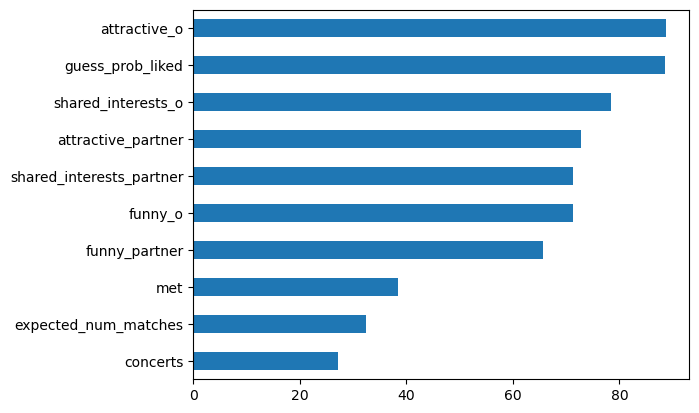

In [75]:
X_train_trans_df2.columns[feature_selector.get_support()]

top_feature_importance_scores = feature_selector.scores_[feature_selector.get_support()]

top_feature_importance_names = X_train_trans_df2.columns[feature_selector.get_support()]

pd.Series(top_feature_importance_scores, index=top_feature_importance_names).sort_values(ascending=True).plot(kind='barh')

## moving forward I'll just use these top 10 features

In [76]:
top10 = ['attractive_o', 'guess_prob_liked', 'shared_interests_o', 'attractive_partner', 'shared_interests_partner', 'funny_o', 'funny_partner', 'met', 'expected_num_matches', 'concerts']

In [77]:
#resplit the data using only the top features. still had to use the non-nan data for the models below
X_top10 = df_no_nan[top10]
y_top10 = df_no_nan['match']

X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(X_top10, y_top10, random_state=0)

## Try ensemble to see which models work the best

In [78]:
from sklearn.naive_bayes import BernoulliNB #choosing Bernoulli since have binary outcome
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#three models that might work well. not using hyperparameters yet
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = BernoulliNB()

#ensemble
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3)],
    voting='hard')

#find accuracies using cross validated scores
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_top10, y_train_top10, scoring='accuracy', cv=5) #using the split dataset without nans
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.85 (+/- 0.01) [Logistic Regression]
Accuracy: 0.86 (+/- 0.00) [Random Forest]
Accuracy: 0.81 (+/- 0.01) [naive Bayes]
Accuracy: 0.85 (+/- 0.01) [Ensemble]


## They were all pretty good but Random Forest was the best. Try finding hyperparameters for random forest

#### first set up preprocessor and model

In [79]:
#have to re-process with only the top 10 columns
transformer_top10 = ColumnTransformer(
        [('numeric', std_scaler, top10)],
        remainder='drop', verbose_feature_names_out=False)

In [80]:
#set up pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

classification_pipeline = Pipeline([('transformer', transformer_top10),
                                    ('RF_model', RandomForestClassifier())])

In [81]:
#find names of parameters
classification_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    ['attractive_o', 'guess_prob_liked',
                                     'shared_interests_o', 'attractive_partner',
                                     'shared_interests_partner', 'funny_o',
                                     'funny_partner', 'met',
                                     'expected_num_matches', 'concerts'])],
                     verbose_feature_names_out=False)),
  ('RF_model', RandomForestClassifier())],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  ['attractive_o', 'guess_prob_liked',
                                   'shared_interests_o', 'attractive_partner',
                                   'shared_interests_partner', 'funny_o',
                                   'funny_partner', 'met',
                                   'expected_

In [13]:
#set up parameters. want to do randomized search
from scipy.stats import randint, uniform

parameters = {
    "RF_model__max_depth": randint(3, 30),
    "RF_model__min_impurity_decrease": uniform(loc=0, scale=0.1),
    'RF_model__min_samples_leaf': randint(2, 10)
} #nothing to hyperparameterize from transfomer since only used the standard scalar in it (all top10 columns were numeric)

In [14]:
#fit model to best parameters
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 10

random_search = RandomizedSearchCV(classification_pipeline, param_distributions=parameters, n_iter=n_iter_search, n_jobs=-1, verbose=True)

random_search.fit(X_train_top10, y_train_top10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               StandardScaler(),
                                                                               ['attractive_o',
                                                                                'guess_prob_liked',
                                                                                'shared_interests_o',
                                                                                'attractive_partner',
                                                                                'shared_interests_partner',
                                                                                'funny_o',
                                                                                'funny_partner',
                                                                                'met',
                                                                                'expected_num_matches',
                                                                                'concerts'])],
                                                                verbose_feature_names_out=False)),
                                             ('RF_model',
                                              RandomFores...
                   n_jobs=-1,
                   param_distributions={'RF_model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15b164750>,
                                        'RF_model__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15b1d24d0>,
                                        'RF_model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15b2db290>},
                   verbose=True)

In [15]:
random_search.best_score_ 
#still best score is only 86%

0.8575344674675482

In [16]:
random_search.best_estimator_
#best max_depth = 23
#best min_impurity_decrease = 0.0008982385551574712
#best min_samples_leaf = 9

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['attractive_o',
                                                   'guess_prob_liked',
                                                   'shared_interests_o',
                                                   'attractive_partner',
                                                   'shared_interests_partner',
                                                   'funny_o', 'funny_partner',
                                                   'met',
                                                   'expected_num_matches',
                                                   'concerts'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_depth=28,
                                        min_impurity_decrease=0.0031507771435238976,
                                        min_samples_leaf=6))])

#### then cross validate

In [17]:
scores = cross_val_score(random_search, X_train_top10, y_train_top10, cv=5)
print(scores.mean(), '\t', scores.std())
#still about 85%

#not sure if this step is necessary? is this part of the randomized search?

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8346287188583407 	 0.019092495600686803


In [18]:
#set up classification for test data
classification_pipeline_test = Pipeline([('transformer', transformer_top10),
                                    ('RF_model', RandomForestClassifier(max_depth=23, min_impurity_decrease=0.0008982385551574712, min_samples_leaf=9))])

#fit and predict
classification_pipeline_test.fit(X_train_top10, y_train_top10)
classification_pipeline_test.predict(X_test_top10)


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
#find accuracy
y_pred = classification_pipeline_test.predict(X_test_top10)
sum(y_pred == y_test_top10) / len(y_test_top10)



0.8625954198473282

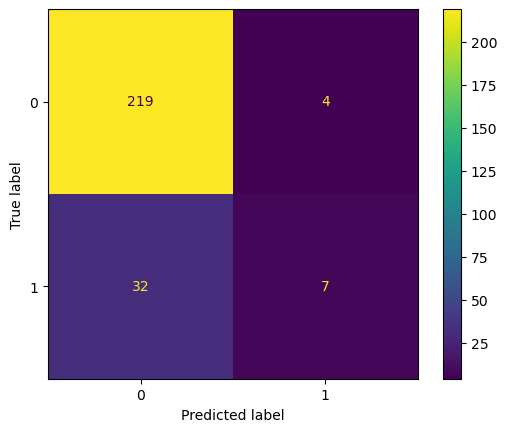

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_top10, y_pred), display_labels=classification_pipeline_test.classes_).plot()

## not many people match in general. does not do a good job at identifying who matches. will retry with all features rather than top 10

#### transform data and find which model works best

In [21]:
#first transform the data since have categorical and numeric data types. use transformer from before
X_train_trans2 = transformer.fit_transform(X_train2)

#find which model works best from all features (from non-nan ds)
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_trans2, y_train2, scoring='accuracy', cv=5) 
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.83 (+/- 0.03) [Logistic Regression]
Accuracy: 0.84 (+/- 0.01) [Random Forest]
Accuracy: 0.79 (+/- 0.02) [naive Bayes]
Accuracy: 0.86 (+/- 0.01) [Ensemble]


#### ensemble does best. set up pipeline then find hyperparameters

In [22]:
classification_pipeline2 = Pipeline([('transformer', transformer_top10),
                                    ('ensemble', VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3)], voting='hard'))])

In [23]:
#find names of parameters
classification_pipeline2.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    ['attractive_o', 'guess_prob_liked',
                                     'shared_interests_o', 'attractive_partner',
                                     'shared_interests_partner', 'funny_o',
                                     'funny_partner', 'met',
                                     'expected_num_matches', 'concerts'])],
                     verbose_feature_names_out=False)),
  ('ensemble',
   VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                                ('rf', RandomForestClassifier(random_state=1)),
                                ('bnb', BernoulliNB())]))],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  ['attractive_o', 'guess_prob_liked',
                                   'shared_interests_o', 'attractive_

In [24]:
parameters2 = {
    "ensemble__lr__penalty": ("None", "l2", "l1", "elasticnet"),
    "ensemble__rf__max_depth": range(3,30),
    'ensemble__rf__min_samples_leaf': range(2, 10),
    "ensemble__bnb__alpha": (0.0, 1.0)
}

In [29]:
#had to do grid search this time since needed to spell out the logistic regression parameter optionss

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(classification_pipeline2, parameters2, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train2, y_train2)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/si

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['attractive_o',
                                                                          'guess_prob_liked',
                                                                          'shared_interests_o',
                                                                          'attractive_partner',
                                                                          'shared_interests_partner',
                                                                          'funny_o',
                                                                          'funny_partner',
                                                                          'met',
                                                                          'expected_num_matches',
                                                                          'concerts'])],
                                                          verbose_feature_names_out=False)),
                                       ('ensemble',
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression(random_state=1)),
                                                                     ('rf',
                                                                      RandomForestClassifier(random_state=1)),
                                                                     ('bnb',
                                                                      BernoulliNB())]))]),
             n_jobs=-1,
             param_grid={'ensemble__bnb__alpha': (0.0, 1.0),
                         'ensemble__lr__penalty': ('None', 'l2', 'l1',
                                                   'elasticnet'),
                         'ensemble__rf__max_depth': range(3, 30),
                         'ensemble__rf__min_samples_leaf': range(2, 10)},
             verbose=1)

In [30]:
grid_search.best_score_
#also 86%

0.8638676844783716

In [31]:
grid_search.best_estimator_
#ensemble__lr__penalty='None'
#ensemble__rf__max_depth=10,
#ensemble__rf__min_samples_leaf=2
#ensemble__bnb__alpha=0.0

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['attractive_o',
                                                   'guess_prob_liked',
                                                   'shared_interests_o',
                                                   'attractive_partner',
                                                   'shared_interests_partner',
                                                   'funny_o', 'funny_partner',
                                                   'met',
                                                   'expected_num_matches',
                                                   'concerts'])],
                                   verbose_feature_names_out=False)),
                ('ensemble',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=1)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_leaf=2,
                                                                      random_state=1)),
                                              ('bnb',
                                               BernoulliNB(alpha=0.0))]))])

#### repeat for test data and find accuracy

In [32]:
#transform test data
X_test_trans2 = transformer.fit_transform(X_test2)

#convert to df
X_test_trans_df2 = pd.DataFrame(X_test_trans2, columns = transformer.get_feature_names_out(),
                                index = X_test2.index)

#fit and predict
grid_search.fit(X_train_trans_df2, y_train2)
grid_search.predict(X_test_trans_df2)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/Haleigh/anaconda3/lib/python3.11/si

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [33]:
#find accuracy
y_pred2 = grid_search.predict(X_test_trans_df2)
sum(y_pred2 == y_test2) / len(y_test2)

#85% accurate

0.8549618320610687

#### confusion matrix

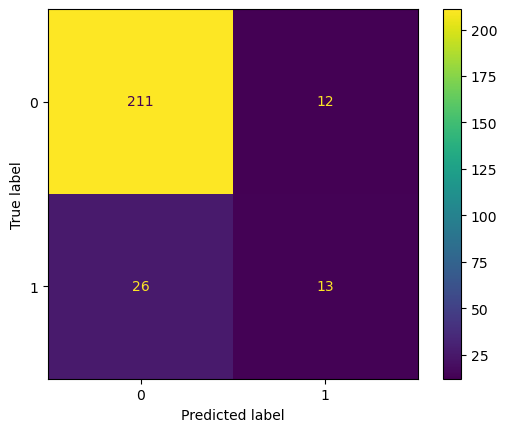

In [35]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test2, y_pred2), display_labels=grid_search.classes_).plot()

## same problem as before, it just doesn't do a good job at identifying matches since there are so few. will try weighing. will use the top10 features since that had a higher accuracy

In [36]:
classification_pipeline_balanced = Pipeline([('transformer', transformer_top10),
                                    ('RF_model', RandomForestClassifier(max_depth=23, min_impurity_decrease=0.0008982385551574712, min_samples_leaf=9, class_weight='balanced'))])

In [37]:
scores3 = cross_val_score(classification_pipeline_balanced, X_train_top10, y_train_top10, cv=5)
print(scores3.mean(), '\t', scores3.std())

#goes down to 80% when balanced weights

0.8040957832782393 	 0.01834125735635416


In [38]:
#fit and predict
classification_pipeline_balanced.fit(X_train_top10, y_train_top10)
classification_pipeline_balanced.predict(X_test_top10)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [40]:
#find accuracy
y_pred3 = classification_pipeline_balanced.predict(X_test_top10)
sum(y_pred3 == y_test_top10) / len(y_test_top10)

#82% accurate on testing data with balanced weights

0.8206106870229007

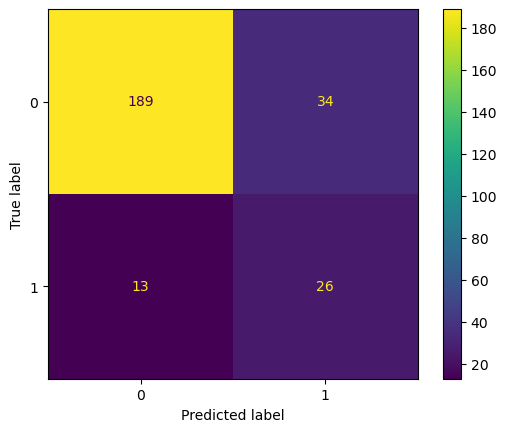

In [41]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_top10, y_pred3), display_labels=classification_pipeline_balanced.classes_).plot()

### balanced weights does predict matches much better, but it also misses non matches more

# PCA

### first see how many dimensions it needs for a good fit

In [61]:
X_train2.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,guess_prob_liked,met
1691,female,21.0,22.0,1,european/caucasian-american,european/caucasian-american,1,10.0,7.0,psychology,25.0,25.0,25.0,15.0,5.0,5.0,7.0,3.0,7.0,10.0,7.0,8.0,20.0,10.0,30.0,20.0,15.0,5.0,8.0,7.0,8.0,9.0,8.0,8.0,5.0,9.0,9.0,10.0,8.0,2.0,2.0,8.0,7.0,3.0,3.0,1.0,1.0,8.0,10.0,2.0,2.0,6.0,4.0,7.0,8.0,1.0,-0.09,3.0,12.0,3.0,7.0,1.0
276,female,25.0,21.0,4,european/caucasian-american,european/caucasian-american,1,10.0,2.0,social work,15.0,20.0,15.0,30.0,5.0,15.0,8.0,7.0,7.0,7.0,6.0,6.0,20.0,20.0,15.0,15.0,15.0,15.0,7.0,9.0,7.0,8.0,6.0,5.0,4.0,7.0,5.0,9.0,7.0,7.0,4.0,7.0,7.0,6.0,3.0,5.0,6.0,8.0,9.0,9.0,7.0,10.0,6.0,8.0,8.0,4.0,0.28,5.0,4.0,0.0,4.0,0.0
62,female,22.0,22.0,0,asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,2.0,4.0,law,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,15.0,25.0,20.0,15.0,10.0,6.0,6.0,5.0,7.0,7.0,3.0,6.0,8.0,7.0,8.0,8.0,5.0,3.0,4.0,10.0,10.0,10.0,2.0,3.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,0.52,7.0,3.0,2.0,8.0,1.0
618,male,26.0,21.0,5,european/caucasian-american,asian/pacific islander/asian-american,0,2.0,3.0,finanace,12.0,18.0,20.0,16.0,16.0,18.0,6.0,8.0,8.0,6.0,8.0,5.0,20.0,35.0,20.0,10.0,10.0,5.0,7.0,8.0,5.0,7.0,7.0,6.0,7.0,10.0,8.0,9.0,8.0,10.0,7.0,5.0,6.0,7.0,7.0,8.0,3.0,7.0,7.0,4.0,4.0,6.0,5.0,6.0,2.0,7.0,0.22,7.0,8.0,4.0,6.0,0.0
1104,female,28.0,30.0,2,european/caucasian-american,other,0,6.0,9.0,journalism,20.0,25.0,25.0,15.0,5.0,10.0,9.0,8.0,9.0,9.0,9.0,8.0,10.0,10.0,20.0,20.0,20.0,20.0,8.0,7.0,8.0,7.0,7.0,3.0,8.0,8.0,6.0,7.0,5.0,6.0,2.0,7.0,9.0,9.0,7.0,7.0,1.0,7.0,7.0,7.0,9.0,9.0,7.0,7.0,7.0,4.0,0.65,5.0,6.0,2.0,8.0,0.0


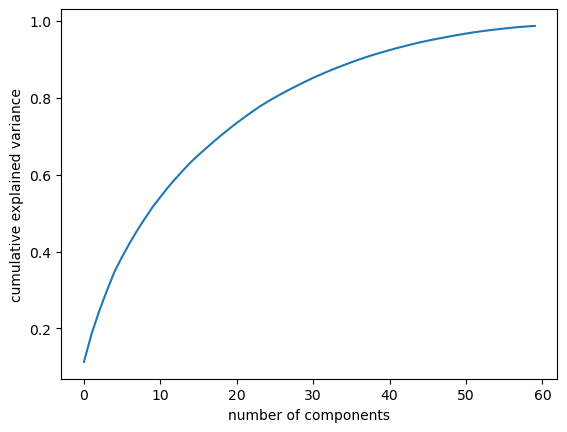

In [82]:
from sklearn.decomposition import PCA

pca = Pipeline([('transformer', transformer),
                         ('pca', PCA(60))]) #first start with most of the features

pca.fit(X_train2) #pca can't handle nan entries either

pca['pca']

import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca['pca'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



### Need about 40 components to get 90% explained

## Now try to use it in combo with supervised ML and see how accurate

In [83]:
from sklearn.pipeline import Pipeline

pca_pipeline = Pipeline([('transformer', transformer),
                         ('scaler', StandardScaler()),
                         ('pca', PCA(40)),
                         ('RF', RandomForestClassifier())]) #use RF since performed best before - but should we use this one or ensemble?

pca_pipeline.fit(X_train2, y_train2)

y_pred = pca_pipeline.predict(X_test2)

sum(y_pred == y_test2)/len(y_test2)

#86% accurate still with PCA and RF (unoptimized)

0.8625954198473282

## look at eigenvalues - help lol

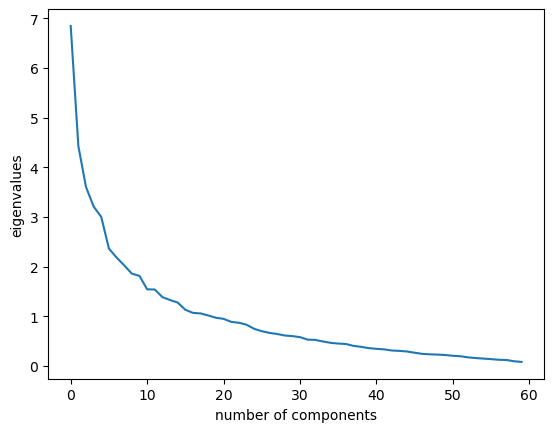

In [109]:

plt.plot(pca.steps[1][1].explained_variance_)
plt.xlabel('number of components')
plt.ylabel('eigenvalues');

#not sure how to find eigenvalues since have to standard scale first but using the pipeline throws this error -- any ideas?
#also don't know how to find what features the first two eigenvalues are made out of. didn't understand that part in class since it wasn't showing the feature names but only numbers

## PCA with only two dimensions

/var/folders/f_/6qh4fqhd4sdg10xsh3wzc6fc0000gn/T/ipykernel_50634/3814541780.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent_r', 2))


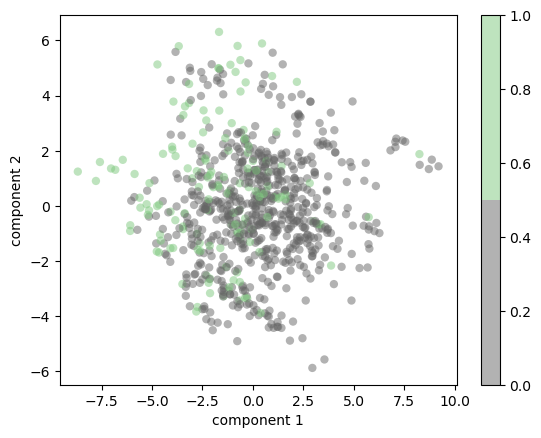

In [111]:
pca2 = Pipeline([('transformer', transformer),
                         ('pca', PCA(2))]) #project to 2 dimensions
projected = pca2.fit_transform(X_train2)

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train2, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent_r', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### it does not do a good job at predicting with only two dimensions- they're all overlapped

# KMeans 

### Kmeans is not applicable for the categorical data (can't find distance between two categorical points, so use only numeric columns instead)

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reduced dataset to top two features since we can only visualize in two dimensions
top2_features = ['attractive_o', 'guess_prob_liked'] 
df_kmeans = df_no_nan[top2_features].dropna() # Drop NaN values since KMeans can't handle them directly
df_kmeans = df_kmeans.to_numpy() # Convert DataFrame to numpy array for KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_kmeans)
y_kmeans = kmeans.predict(df_kmeans)

plt.figure(figsize=(8, 6)) # Adjust figure size for better visualization
plt.scatter(df_kmeans[:, 0], df_kmeans[:, 1], c=y_kmeans, s=50, edgecolor='none', alpha=0.5, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5, label='Centroids')
plt.xlabel('attractive_o')
plt.ylabel('guess_prob_liked')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

NameError: name 'df_no_nan' is not defined

## Don't think I did this correctly. would expect the purples to be 1.0 (yellow) and yellows to be 0.0 (purple)